In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nice
plt.style.use("seaborn-v0_8")  
sns.set_palette("Set2")



In [4]:
# Loading Netflix dataset
df = pd.read_csv("../data/netflix_titles.csv")

# first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Shape of dataset (rows, columns)
print("Shape:", df.shape)

# Info about columns
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed

In [5]:
# Shape of dataset (rows, columns)
print("Shape:", df.shape)

# Info about columns
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed

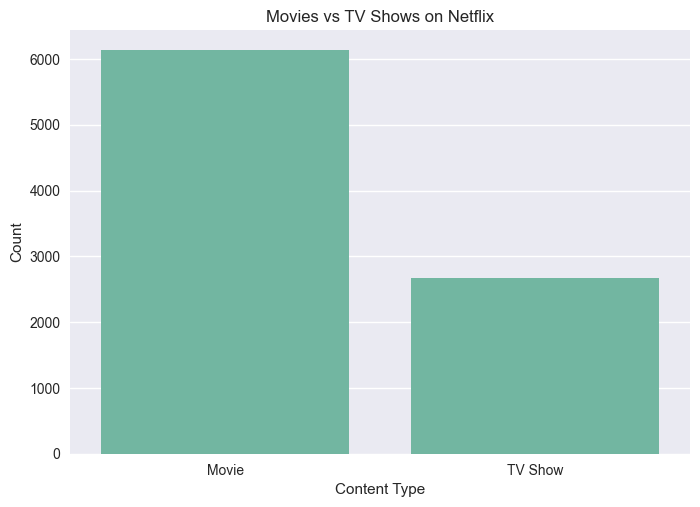

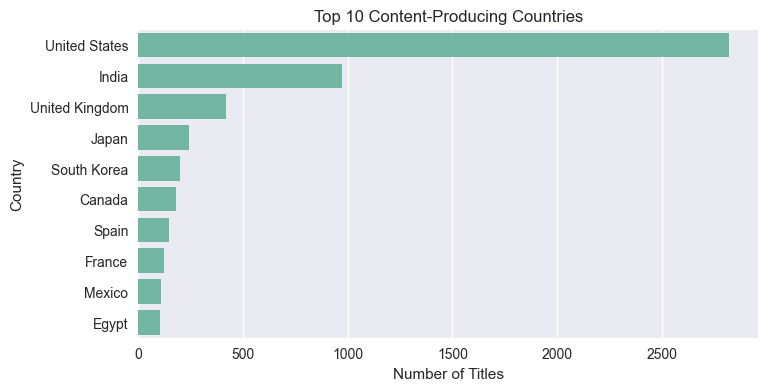

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Movies vs TV Shows count
sns.countplot(data=df, x="type")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

# Top 10 countries producing Netflix content
top_countries = (
    df["country"]
    .dropna()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


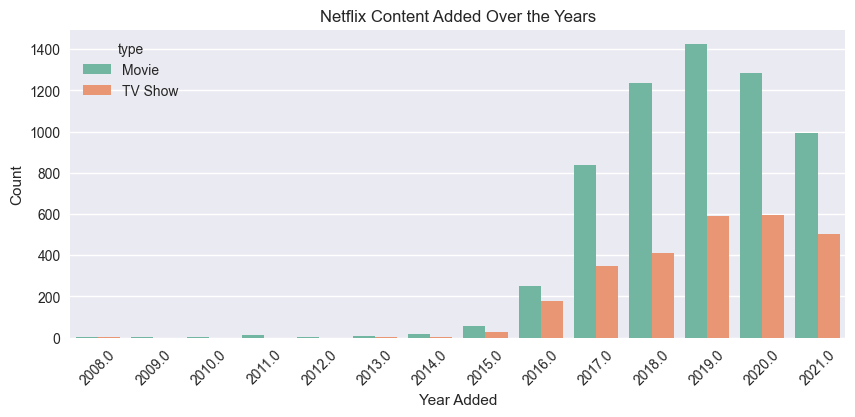

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(),
                                  errors='coerce',
                                  format='mixed')
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,4))
sns.countplot(data=df, x="year_added", hue="type")
plt.title("Netflix Content Added Over the Years")
plt.xticks(rotation=45)
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()


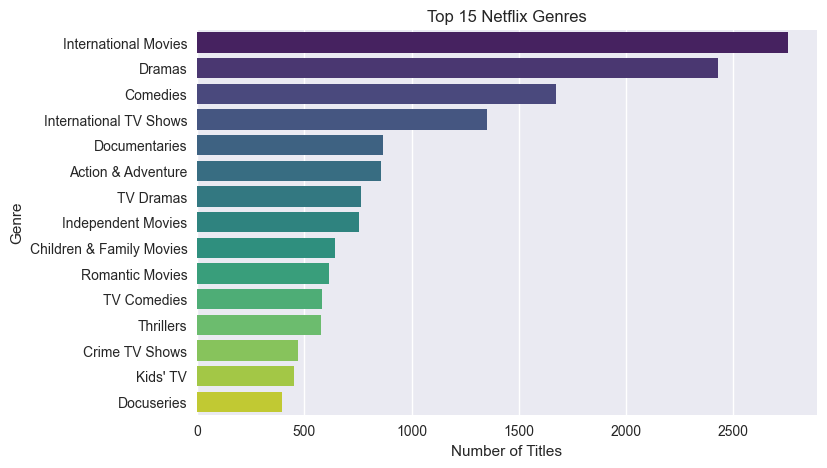

In [10]:
# Split the comma-separated genre list and count top 15 genres
genre_counts = (
    df['listed_in']
      .str.split(', ')
      .explode()
      .value_counts()
      .head(15)
)

plt.figure(figsize=(8,5))
sns.barplot(x=genre_counts.values,
            y=genre_counts.index,
            hue=genre_counts.index,   # assign y as hue
            palette="viridis",
            legend=False)

plt.title("Top 15 Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


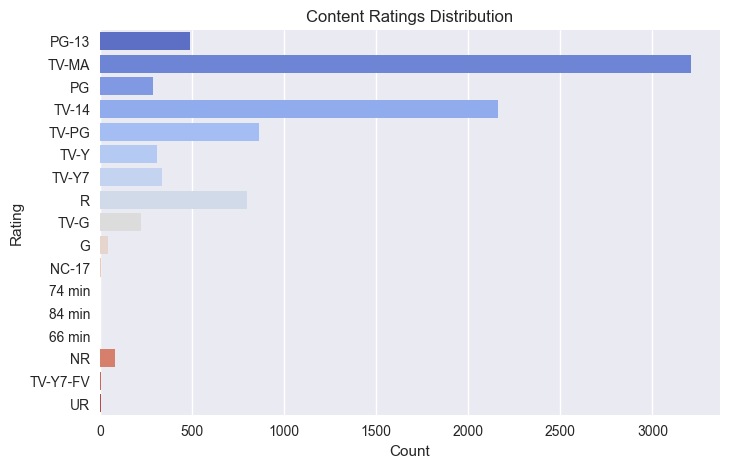

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(
    y="rating",
    data=df,
    hue="rating",          # assign hue to match y
    palette="coolwarm",
    legend=False           # hides duplicate legend
)
plt.title("Content Ratings Distribution")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


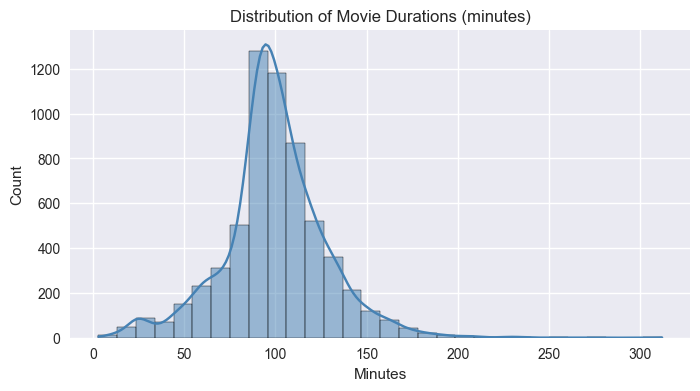

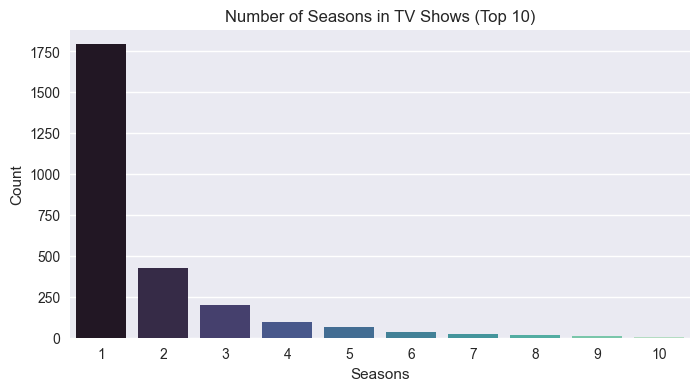

In [15]:
# --- Movie durations & TV Show seasons analysis ---

# 1️ Separate movies and TV shows
movies = df[df["type"] == "Movie"].copy()
shows  = df[df["type"] == "TV Show"].copy()

# 2️ Movie duration (convert "123 min" → numeric minutes)
movies["duration_min"] = (
    movies["duration"]
    .str.replace(" min", "", regex=False)
    .astype(float)
)

# Histogram of movie lengths
plt.figure(figsize=(8,4))
sns.histplot(movies["duration_min"], bins=30, kde=True, color="steelblue")
plt.title("Distribution of Movie Durations (minutes)")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()

# 3️ TV show seasons
shows["seasons"] = (
    shows["duration"]
    .str.replace(" Seasons", "", regex=False)
    .str.replace(" Season",  "", regex=False)
)

# Top 10 most common season counts
season_counts = shows["seasons"].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(
    x=season_counts.index,
    y=season_counts.values,
    hue=season_counts.index,   # future-proof for Seaborn ≥0.14
    palette="mako",
    legend=False
)
plt.title("Number of Seasons in TV Shows (Top 10)")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()


In [16]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

stop = set(stopwords.words("english"))

def clean_text(s):
    if pd.isna(s): 
        return ""
    s = s.lower()
    s = re.sub(r"[^a-z0-9\s]", " ", s)
    tokens = [w for w in s.split() if w not in stop]
    return " ".join(tokens)

df["meta"] = (
    df["description"].apply(clean_text) + " " +
    df["listed_in"].apply(clean_text) + " " +
    df["director"].fillna("").apply(clean_text) + " " +
    df["cast"].fillna("").apply(clean_text)
)

df["meta"].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    father nears end life filmmaker kirsten johnso...
1    crossing paths party cape town teen sets prove...
2    protect family powerful drug lord skilled thie...
3    feuds flirtations toilet talk go among incarce...
4    city coaching centers known train india finest...
Name: meta, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF transform
tfidf = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf.fit_transform(df["meta"])

def recommend(title, topn=10):
    if title not in df["title"].values:
        return pd.DataFrame({"message": [f"'{title}' not found in dataset"]})
    idx = df[df["title"] == title].index[0]
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    sim_idx = sim_scores.argsort()[-topn-1:-1][::-1]
    return df.iloc[sim_idx][["title", "release_year", "listed_in"]]

# Example
recommend("Breaking Bad", topn=10)



,title,release_year,listed_in
2931,Better Call Saul,2018,"Crime TV Shows, TV Comedies, TV Dramas"
6996,Hormones,2015,"International TV Shows, Romantic TV Shows, TV ..."
8505,The Show,2017,Dramas
355,The Lincoln Lawyer,2011,"Dramas, Thrillers"
7984,Servant of the People,2015,"International TV Shows, TV Comedies"
5352,"Have You Ever Fallen in Love, Miss Jiang?",2016,"Crime TV Shows, International TV Shows, TV Dramas"
5885,W/ Bob & David,2015,TV Comedies
679,The Judgement,2018,"Crime TV Shows, International TV Shows, TV Dramas"
5606,Girlfriend's Day,2017,"Comedies, Independent Movies"
1067,The Underclass,2020,"International TV Shows, TV Dramas, Teen TV Shows"
